<a href="https://colab.research.google.com/github/MinhDucBee1209/Bai-Tap-AI/blob/main/AI_W9_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(y_train.shape)

169001437/169001437 [==============================] - 6s 0us/step
(50000, 1)


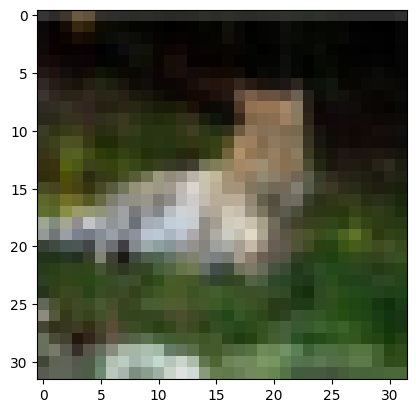

In [2]:
import matplotlib.pyplot as plt

thing = x_train[85]
plt.imshow(thing,cmap=plt.cm.binary)
plt.show()

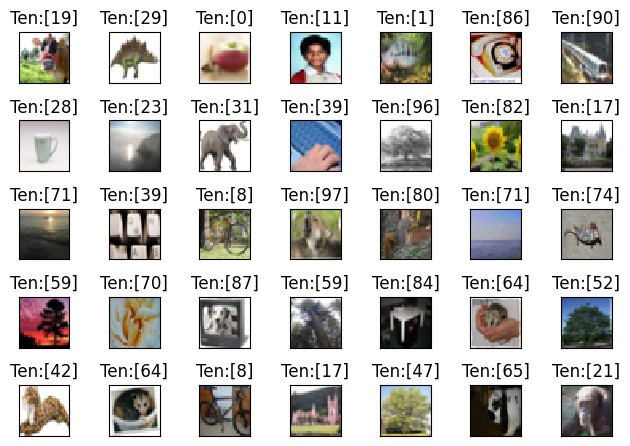

In [3]:
for i in range(35):
  plt.subplot(5,7,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('Ten:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(6000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 6000)              60006000  
                                                                 
 dense_2 (Dense)             (None, 1000)              6001000   
                                                                 
 dense_3 (Dense)             (None, 100)               100100    
                                                                 
Total params: 96,837,100
Trainable params: 96,837,100
Non-trainable params: 0
_________________________________________________________________


In [5]:
X = x_test
y= y_test
     
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255  

x_test.shape

(10000, 3072)

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',round(test_acc*100,3),'%')

Epoch 1/10
391/391 [==============================] - 20s 32ms/step - loss: 4.7017 - accuracy: 0.0477
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 3.9023 - accuracy: 0.0983
Epoch 3/10
391/391 [==============================] - 11s 27ms/step - loss: 3.6901 - accuracy: 0.1350
Epoch 4/10
391/391 [==============================] - 10s 26ms/step - loss: 3.5494 - accuracy: 0.1591
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 3.4448 - accuracy: 0.1759
Epoch 6/10
391/391 [==============================] - 11s 27ms/step - loss: 3.3562 - accuracy: 0.1924
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 3.2611 - accuracy: 0.2110
Epoch 8/10
391/391 [==============================] - 11s 27ms/step - loss: 3.1772 - accuracy: 0.2223
Epoch 9/10
391/391 [==============================] - 11s 27ms/step - loss: 3.0943 - accuracy: 0.2401
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 3.5079 

In [8]:
model.save('test2.h5')

1/1 [==============================] - 0s 97ms/step


array([24])

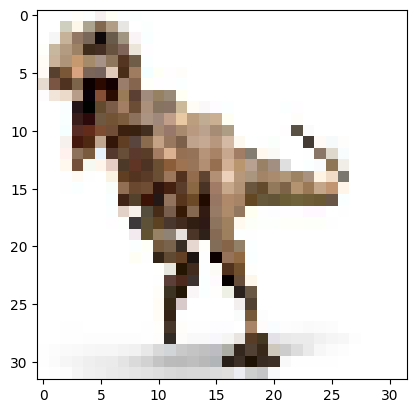

In [9]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
img = load_img("/content/khung_long.jpg",target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,32*32*3)
img = img.astype('float32')
img =img/255
model10 = load_model('test2.h5')
np.argmax(model10.predict(img),axis=1)